In [1]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
import numpy as np
import pandas as pd
FF = pd.read_csv("forestfires.csv")

In [3]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
FF.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
FF.shape

(517, 31)

Text(0.5, 1.0, 'temp')

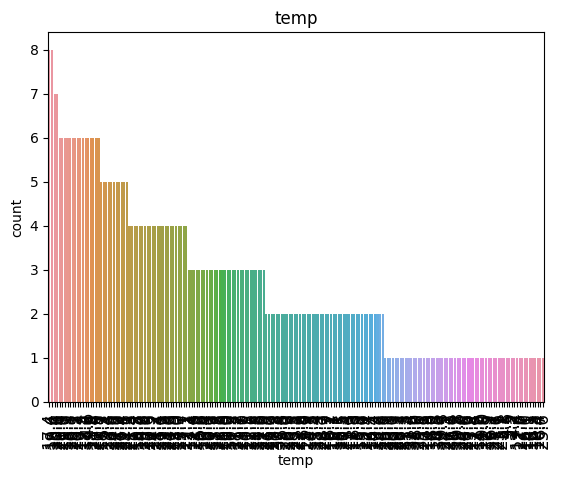

In [26]:
# Temp
sns.countplot(x='temp', data=FF,
              order=FF['temp'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('temp')

Text(0.5, 1.0, 'wind')

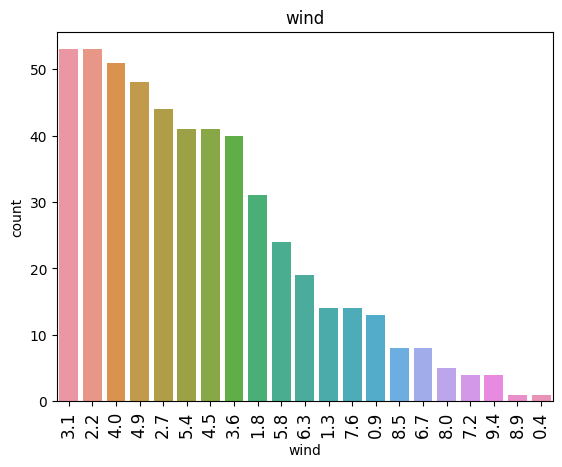

In [27]:
# Wind
sns.countplot(x='wind', data=FF,
              order=FF['wind'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('wind')

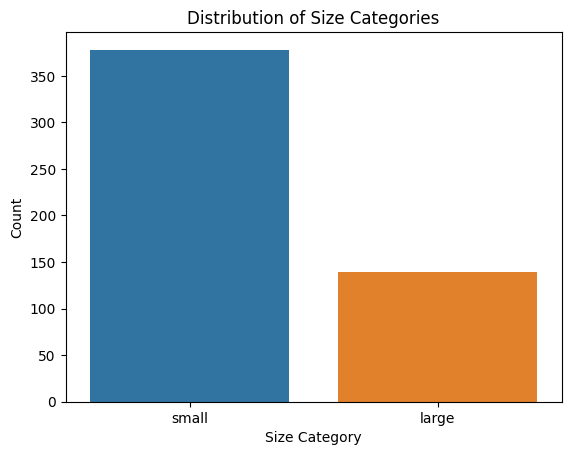

In [31]:
# Wind and temp
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot for the 'size_category' column
sns.countplot(x='size_category', data=FF,)
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.title('Distribution of Size Categories')

# Show the plot
plt.show()


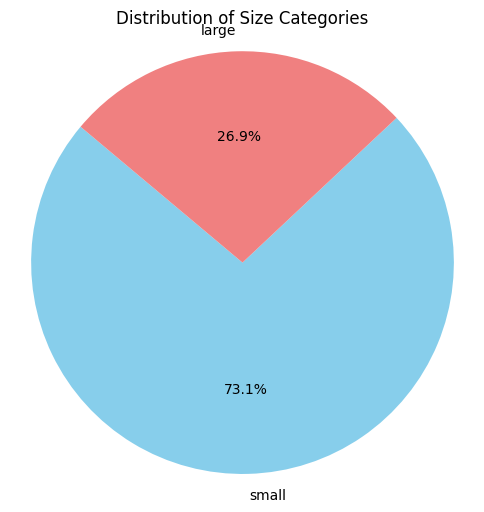

In [33]:
category_counts = FF['size_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Size Categories')
plt.axis('equal')
plt.show()


In [6]:
F1 = FF.iloc[:,0:11]
Forest = pd.concat([F1,FF['size_category']],axis=1)
Forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [7]:
# Lable Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LE = preprocessing.LabelEncoder()
LE = LabelEncoder()
Forest['month'] = LE.fit_transform(Forest['month'])
Forest['day'] = LE.fit_transform(Forest['day'])
Forest['size_category'] = LE.fit_transform(Forest['size_category'])

In [8]:
Forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [9]:
X = Forest.iloc[:,0:11]
Y = Forest.iloc[:,-1]
X.head(9)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0


In [10]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Forest, hue='size_category')

Output hidden; open in https://colab.research.google.com to view.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.28)


In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((372, 11), (145, 11), (372,), (145,))

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an instance of the SVC classifier
clf = SVC()
parameters = {'kernel': ['rbf'],
              'gamma': [0.0001, 0.01, 0.1],
              'C': [50, 35, 15, 12, 5, 0.001]
             }

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid=parameters, cv=10)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 35, 15, 12, 5, 0.001],
                         'gamma': [0.0001, 0.01, 0.1], 'kernel': ['rbf']})

In [15]:
grid_search.best_params_

{'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}

In [16]:
grid_search.best_score_

0.9298719772403983

In [17]:
model = SVC(C = 50, gamma = 0.0001)
model.fit(X_train, Y_train)

SVC(C=50, gamma=0.0001)

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [19]:
from sklearn.metrics import accuracy_score
Acc = accuracy_score(Y_test, y_pred)* 100
print("Accuracy = ", Acc)

Accuracy =  96.55172413793103


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 34,   2],
       [  3, 106]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.98      0.97      0.98       109

    accuracy                           0.97       145
   macro avg       0.95      0.96      0.95       145
weighted avg       0.97      0.97      0.97       145

